
# Project: Investigating NoShow Appointments Dataset 
Dataset used : noshowappointments-kagglev2-may-2016

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### About the Dataset  
This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.   

#### Column Names  
**PatientId**: Unique ID of the patient. **Integer**.  
**AppointmentID**: Unique ID of the Appointment. **Integer**.   
**Gender**: Patient's gender. **M** for Male, **F** for Female.  
**ScheduledDay**: The date of scheduling an appointment. **Date & Time**.  
**AppointmentDay**: The date of the Appointment. **Date & Time**.  
**Age**: Age of the patient. **Integer**.  
**Neighbourhood**: The place of appointment. **String**.  
**Scholarship**: Wheteher the patient is enrolled in Benefit Scheme. **One Hot Encoded**.  
**Hipertension**: Tells whether the patient suffers from Hypertension. **One Hot Encoded**.  
**Diabetes**: Patient is Diabetic or not. **One Hot Encoded**.  
**Alcoholism**: Is the patient Alcoholic? **One Hot Encoded**.  
**Handcap**: Patient is Handicapped or not. **Integer**.  
**SMS_received**: Did the Patient received a SMS about the Appointment. **One Hot Encoded**.  
**No-show**: Describes whether the patient showed up or not. **No** means *Patient Showed up*, & **Yes** means *Patient was a No Show*.  



In [1]:
# Importing the necessary libraries for the Investigation.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

The first part of any Investigation is Data Wrangling.  

First Step, therefore is importing the csv file.

In [2]:
noshow = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

### General Properties  
Let's see some rows from the file now.

In [3]:
noshow.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
# Let's see unique elements in some columns.
noshow['Age'].unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99,  -1], dtype=int64)

** Looks like there is a problem in the Dataset**  
Ages 0 and -1 are false.
Also, age 115 seems far fetched.
We will address such anomalies in Data Cleaning process.

In [5]:
noshow['ScheduledDay'].unique()

array(['2016-04-29T18:38:08Z', '2016-04-29T16:08:27Z',
       '2016-04-29T16:19:04Z', ..., '2016-04-27T16:03:52Z',
       '2016-04-27T15:09:23Z', '2016-04-27T13:30:56Z'], dtype=object)

In [6]:
noshow['AppointmentDay'].unique()

array(['2016-04-29T00:00:00Z', '2016-05-03T00:00:00Z',
       '2016-05-10T00:00:00Z', '2016-05-17T00:00:00Z',
       '2016-05-24T00:00:00Z', '2016-05-31T00:00:00Z',
       '2016-05-02T00:00:00Z', '2016-05-30T00:00:00Z',
       '2016-05-16T00:00:00Z', '2016-05-04T00:00:00Z',
       '2016-05-19T00:00:00Z', '2016-05-12T00:00:00Z',
       '2016-05-06T00:00:00Z', '2016-05-20T00:00:00Z',
       '2016-05-05T00:00:00Z', '2016-05-13T00:00:00Z',
       '2016-05-09T00:00:00Z', '2016-05-25T00:00:00Z',
       '2016-05-11T00:00:00Z', '2016-05-18T00:00:00Z',
       '2016-05-14T00:00:00Z', '2016-06-02T00:00:00Z',
       '2016-06-03T00:00:00Z', '2016-06-06T00:00:00Z',
       '2016-06-07T00:00:00Z', '2016-06-01T00:00:00Z',
       '2016-06-08T00:00:00Z'], dtype=object)

In [7]:
noshow['Neighbourhood'].unique()

array(['JARDIM DA PENHA', 'MATA DA PRAIA', 'PONTAL DE CAMBURI',
       'REPÚBLICA', 'GOIABEIRAS', 'ANDORINHAS', 'CONQUISTA',
       'NOVA PALESTINA', 'DA PENHA', 'TABUAZEIRO', 'BENTO FERREIRA',
       'SÃO PEDRO', 'SANTA MARTHA', 'SÃO CRISTÓVÃO', 'MARUÍPE',
       'GRANDE VITÓRIA', 'SÃO BENEDITO', 'ILHA DAS CAIEIRAS',
       'SANTO ANDRÉ', 'SOLON BORGES', 'BONFIM', 'JARDIM CAMBURI',
       'MARIA ORTIZ', 'JABOUR', 'ANTÔNIO HONÓRIO', 'RESISTÊNCIA',
       'ILHA DE SANTA MARIA', 'JUCUTUQUARA', 'MONTE BELO',
       'MÁRIO CYPRESTE', 'SANTO ANTÔNIO', 'BELA VISTA', 'PRAIA DO SUÁ',
       'SANTA HELENA', 'ITARARÉ', 'INHANGUETÁ', 'UNIVERSITÁRIO',
       'SÃO JOSÉ', 'REDENÇÃO', 'SANTA CLARA', 'CENTRO', 'PARQUE MOSCOSO',
       'DO MOSCOSO', 'SANTOS DUMONT', 'CARATOÍRA', 'ARIOVALDO FAVALESSA',
       'ILHA DO FRADE', 'GURIGICA', 'JOANA D´ARC', 'CONSOLAÇÃO',
       'PRAIA DO CANTO', 'BOA VISTA', 'MORADA DE CAMBURI', 'SANTA LUÍZA',
       'SANTA LÚCIA', 'BARRO VERMELHO', 'ESTRELINHA', 'FORTE SÃO 

In [8]:
noshow['SMS_received'].unique()

array([0, 1], dtype=int64)

In [9]:
noshow['Handcap'].unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [10]:
noshow['No-show'].unique()

array(['No', 'Yes'], dtype=object)

### Data Cleaning 

The age attribute has a problem.  
The age can't be 0 or less.  
Similarly, as good as it is to live above 100, it is not a normal occurence.  
Therefore, we will be treating it as an outlier.  


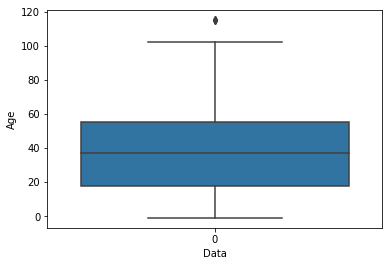

In [11]:
sns.boxplot(data=noshow['Age'])
plt.ylabel('Age')
plt.xlabel('Data')
plt.show()

This shows that the maximum number of patients are in the range of 20-55 years old.

In [12]:
noshow = noshow[(noshow.Age >0) & (noshow.Age<100) ]
noshow['Age'].unique()

array([62, 56,  8, 76, 23, 39, 21, 19, 30, 29, 22, 28, 54, 15, 50, 40, 46,
        4, 13, 65, 45, 51, 32, 12, 61, 38, 79, 18, 63, 64, 85, 59, 55, 71,
       49, 78, 31, 58, 27,  6,  2, 11,  7,  3,  1, 69, 68, 60, 67, 36, 10,
       35, 20, 26, 34, 33, 16, 42,  5, 47, 17, 41, 44, 37, 24, 66, 77, 81,
       70, 53, 75, 73, 52, 74, 43, 89, 57, 14,  9, 48, 83, 72, 25, 80, 87,
       88, 84, 82, 90, 94, 86, 91, 98, 92, 96, 93, 95, 97, 99], dtype=int64)

So, the outliers and impossible ages have been removed.

Let's convert the ScheduledDate and AppointmentDate to NumPy's Date format.

In [13]:
noshow.ScheduledDay = noshow.ScheduledDay.apply(np.datetime64)
noshow.AppointmentDay = noshow.AppointmentDay.apply(np.datetime64)

noshow.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


The time from AppointmentDay is not present now since it was 00:00:00 in all rows i.e. the appointment was given for the day and no time was given.

<a id='eda'></a>
## Exploratory Data Analysis


### Question 1 What is the dependent variable?


Since, we are predicting Show or No-Show of patient, **No-show** is our dependent variable.


### Question 2  What are the Independent Variables?

An independent variable is the variable that is changed or controlled in a scientific experiment to test the effects on the dependent variable.  
  
Here, **Age, Scholarship, Gender, conditions like Alcoholism** are Independent.

### Question 3 Which Factors affect No-show attribute? 

In [14]:
#a function to create a probability from the data
def prob(factor):
    df = pd.crosstab(index=noshow[factor], columns=noshow['No-show']).reset_index()
    df['probShowUp'] = df['No'] / (df['No'] + df['Yes'])
    return( df[[factor, 'probShowUp']])

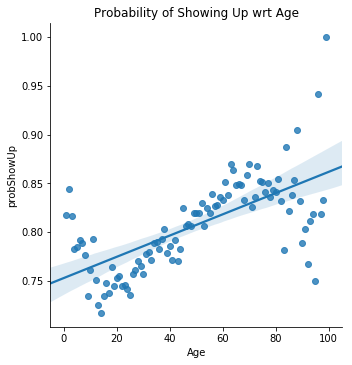

In [15]:
sns.lmplot(data = prob('Age'), x = 'Age', y = 'probShowUp', fit_reg = True)
plt.title('Probability of Showing Up wrt Age')
plt.show()

In [16]:
# the above function is not fit for categorical data, therefore a new function for categorical data will have to be created
def category(factor):
    rows = []
    for item in noshow[factor].unique():
        row = {'Condition': factor}
        total = len(noshow[noshow[factor] == item])
        n = len(noshow[(noshow[factor] == item) & (noshow['No-show'] == 'No')])
        prob = n / total
        row.update({'Level': item, 'Probability': prob})
        rows.append(row)
    return pd.DataFrame(rows)    

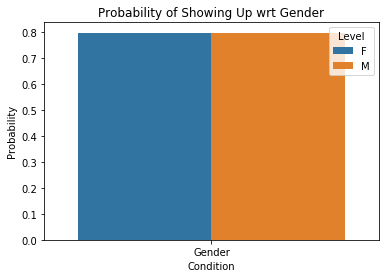

In [17]:
sns.barplot(data = category('Gender'), x='Condition', y='Probability', hue='Level')
plt.title('Probability of Showing Up wrt Gender')
plt.show()

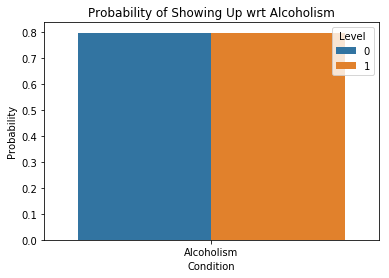

In [18]:
sns.barplot(data = category('Alcoholism'), x='Condition', y='Probability', hue='Level')
plt.title('Probability of Showing Up wrt Alcoholism')
plt.show()

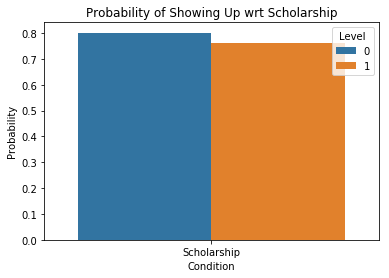

In [19]:
sns.barplot(data = category('Scholarship'), x='Condition', y='Probability', hue='Level')
plt.title('Probability of Showing Up wrt Scholarship')
plt.show()

<a id='conclusions'></a>
## Conclusions

From the above visualisations it is hinted that   
**Age**: Affects the No-show maximum.  
**Rest**: There was minimal effect of other categories on No-show.   
  
"Causation does not means Correlation".  
Therefore, it is entirely possible that there are other factors not present in the data that may have influenced the results.  
Factors such as *Schedule of Patients* may have affected more.

From logic point of view, I think Age seems to affect more due to increased number of ailments in older people which needs Medical Attention. 

## Sources  
  
https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet  
https://pandas.pydata.org/pandas-docs/stable/generated/pandas.crosstab.html   
https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.reset_index.html  
https://elitedatascience.com/python-seaborn-tutorial   
https://www.kaggle.com/somrikbanerjee/predicting-show-up-no-show  